In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
with zipfile.ZipFile('/content/drive/My Drive/home-credit-default-risk.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/My Drive/my_credit')


In [3]:
import pandas as pd
import numpy as np
import sklearn
import scipy as sp

In [6]:
data = pd.read_csv("my_credit/application_train.csv")

In [7]:
nans = pd.concat([data.isnull().sum()],  axis=1, keys=['num_of_nans'])

In [8]:
nans

,num_of_nans
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [9]:
uniques = data.nunique()
nan_cols = nans[nans['num_of_nans'] > 0].index

In [10]:
types = data.dtypes

In [11]:
for col in nan_cols:
    if types[col] == 'object':
        data[col].fillna(data[col].mode()[0], inplace = True)
        print(col)
    else:
        if uniques[col] <= 10:
            data[col].fillna(data[col].mode()[0], inplace = True)
        else:
            data[col].fillna(data[col].median(), inplace = True)



NAME_TYPE_SUITE
OCCUPATION_TYPE
FONDKAPREMONT_MODE
HOUSETYPE_MODE
WALLSMATERIAL_MODE
EMERGENCYSTATE_MODE


In [12]:
nan_check = pd.concat([data.isnull().sum()],  axis=1, keys=['num_of_nans'])
nan_cols_check = nan_check[nan_check['num_of_nans'] > 0].index

In [13]:
cat_cols = []
numerical_cols = []

In [14]:
cols = data.columns

In [15]:
for col in cols:
    if types[col] == 'object':
        cat_cols.append(col)
    else:
        if uniques[col] <= 10:
            cat_cols.append(col)
        else:
            numerical_cols.append(col)

In [16]:
cat_cols = cat_cols[1:]

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [18]:
Y = data['TARGET']

In [19]:
X = data.drop(['TARGET', 'SK_ID_CURR'], axis = 1)

In [20]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
X[cat_cols] = X[cat_cols].apply(LabelEncoder().fit_transform)

In [ ]:
results_depths = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
max_depths = np.linspace(4, 20, 5, dtype = int,  endpoint=True)
for depth in max_depths:
    clf = DecisionTreeClassifier(max_depth = depth)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    roc_aucs = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        print(predict)
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_aucs.append(roc_auc)
    print(roc_aucs)
    results_depths.append(np.mean(roc_aucs))

[0.32022472 0.04562775 0.03038855 ... 0.12705608 0.03038855 0.21573252]
0 0.6969027831978009
[0.11348211 0.04689337 0.04249075 ... 0.21043793 0.02361685 0.08522413]
1 0.696855459487174
[0.21871067 0.12729801 0.07993641 ... 0.07993641 0.04705143 0.12729801]
2 0.693756000705973
[0.08298497 0.04545568 0.043663   ... 0.043663   0.08298497 0.08298497]
3 0.7022604716895985
[0.05312804 0.31714527 0.04880691 ... 0.11041026 0.04880691 0.14285714]
4 0.6996294606418595
[0.6969027831978009, 0.696855459487174, 0.693756000705973, 0.7022604716895985, 0.6996294606418595]
[0.35261538 0.04848485 0.03951916 ... 0.1727195  0.03293583 0.23349326]
0 0.7172499906743721
[0.15094895 0.06332454 0.07611465 ... 0.12828947 0.02494895 0.1278618 ]
1 0.7156738115655756
[0.29632063 0.0946087  0.08386727 ... 0.05501535 0.06452482 0.18021154]
2 0.7105189535963568
[0.07450805 0.06079256 0.03011551 ... 0.05835635 0.11135263 0.05674386]
3 0.7183342574674793
[0.02278606 0.48474576 0.03338279 ... 0.09767814 0.07518797 0.1239

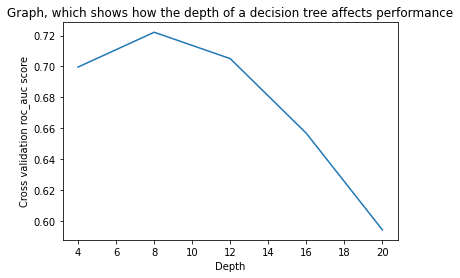

In [ ]:
import matplotlib.pyplot as plt
plt.plot(max_depths,results_depths)
plt.title('Graph, which shows how the depth of a decision tree affects performance')
plt.xlabel('Depth')
plt.ylabel('Cross validation roc_auc score')
plt.show()

In [ ]:
results_samples_split = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
min_samples_splits = np.linspace(0.01, 0.02, 6, endpoint=True)
for split in min_samples_splits:
    clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = split)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    roc_aucs = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_aucs.append(roc_auc)
    print(roc_aucs)
    results_samples_split.append(np.mean(roc_aucs))

0 0.7199250076039736
1 0.7174683663038726
2 0.7125183694574023
3 0.7241185530095002
4 0.7247967426223458
[0.7199250076039736, 0.7174683663038726, 0.7125183694574023, 0.7241185530095002, 0.7247967426223458]
0 0.719710353168705
1 0.7174091678311263
2 0.712284020701955
3 0.7238727546328859
4 0.7251942873962374
[0.719710353168705, 0.7174091678311263, 0.712284020701955, 0.7238727546328859, 0.7251942873962374]
0 0.7203363933349021
1 0.7169971284141967
2 0.7122884000413321
3 0.7239313377371284
4 0.7248262248725882
[0.7203363933349021, 0.7169971284141967, 0.7122884000413321, 0.7239313377371284, 0.7248262248725882]
0 0.7201020869320693
1 0.7167489665490725
2 0.7120387404484994
3 0.7235072923879331
4 0.724623881345242
[0.7201020869320693, 0.7167489665490725, 0.7120387404484994, 0.7235072923879331, 0.724623881345242]
0 0.7195123342190288
1 0.716599094285664
2 0.711745798296135
3 0.7234138996042078
4 0.7245357564491939
[0.7195123342190288, 0.716599094285664, 0.711745798296135, 0.7234138996042078, 

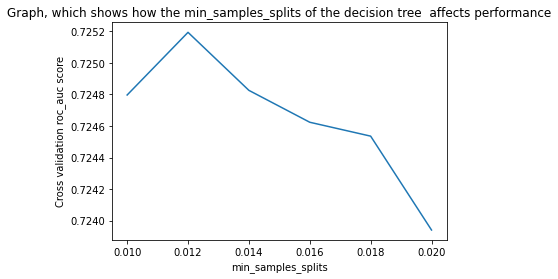

In [ ]:
plt.plot(min_samples_splits,results_samples_split)
plt.title('Graph, which shows how the min_samples_splits of the decision tree  affects performance')
plt.xlabel('min_samples_splits')
plt.ylabel('Cross validation roc_auc score')
plt.show()

In [ ]:
min_samples_leafs = np.linspace(2, 7, 5, dtype = int, endpoint=True)

In [ ]:
min_samples_leafs = [0, 5, 7, 15, 25, 30, 60]


In [ ]:
min_samples_leafs

array([  0,  11,  22,  33,  44,  55,  66,  77,  88, 100])

In [21]:
results_samples_leaf = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
min_samples_leafs = [10, 100, 500, 1000, 1500, 2000]
for min_leaf in min_samples_leafs:
    clf = DecisionTreeClassifier(max_depth = 8, min_samples_split = 0.012, min_samples_leaf = min_leaf)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    roc_aucs = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_aucs.append(roc_auc)
    print(roc_aucs)
    results_samples_leaf.append(np.mean(roc_aucs))

0 0.7193913126753935
1 0.7173175708062787
2 0.7135490662248064
3 0.7249721475117552
4 0.72571621273006
[0.7193913126753935, 0.7173175708062787, 0.7135490662248064, 0.7249721475117552, 0.72571621273006]
0 0.7192917311091471
1 0.7175774455518982
2 0.7149454919289752
3 0.72443079988085
4 0.725928329428983
[0.7192917311091471, 0.7175774455518982, 0.7149454919289752, 0.72443079988085, 0.725928329428983]
0 0.7199794029159088
1 0.7184617157707407
2 0.714690165268783
3 0.7235427054447426
4 0.7246782404307397
[0.7199794029159088, 0.7184617157707407, 0.714690165268783, 0.7235427054447426, 0.7246782404307397]
0 0.7205027194965883
1 0.7191346977494324
2 0.7146749076432979
3 0.7234351789499877
4 0.7245911353438995
[0.7205027194965883, 0.7191346977494324, 0.7146749076432979, 0.7234351789499877, 0.7245911353438995]
0 0.7194726698125118
1 0.718717226928371
2 0.713626844285435
3 0.7234082436131839
4 0.72393243081231
[0.7194726698125118, 0.718717226928371, 0.713626844285435, 0.7234082436131839, 0.723932

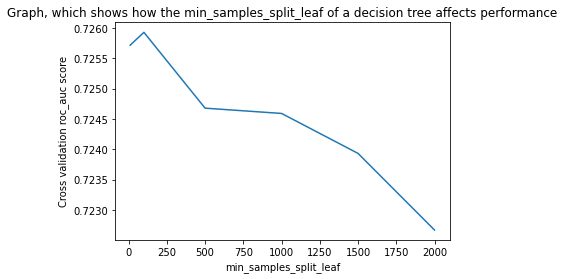

In [ ]:
import matplotlib.pyplot as plt
plt.plot(min_samples_leafs,results_samples_leaf)
plt.title('Graph, which shows how the min_samples_split_leaf of a decision tree affects performance')
plt.xlabel('min_samples_split_leaf')
plt.ylabel('Cross validation roc_auc score')
plt.show()

##### The best result is achieved with parameters of depth = 8, min_samples_split = 0.012 and min_samples_split_leaf = 125.


# Gridsearch and RandomSearch decision tree

In [23]:
tree_param = {'max_depth':[4, 6, 10],
              'min_samples_split': np.linspace(0.01, 0.04, 4, endpoint=True),
              'min_samples_leaf': [20, 50, 100, 200, 400]
              }


In [24]:
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [25]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)

In [26]:
from sklearn.tree import DecisionTreeClassifier
grid_tree = DecisionTreeClassifier()

In [42]:
grid_search_tree = GridSearchCV(grid_tree, param_grid=tree_param,  scoring='roc_auc', n_jobs=-1, cv=skf.split(X,Y), verbose = 10)

In [43]:
grid_search_tree.fit(X, Y)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   33.9s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  6

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fb04af830a0>,
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             pa

In [44]:
print(grid_search_tree.best_estimator_)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=400, min_samples_split=0.02,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [45]:
print(grid_search_tree.best_score_)

0.7215380240068965


In [27]:
params = {
        'max_depth':[4, 6 ,8, 10, 12, 15, 20, 30, 50],
        'min_samples_split': np.linspace(0.01, 0.04, 24, endpoint=True),
        'min_samples_leaf': [20, 50, 100, 150, 200, 400,  1000, 2500]
}

In [28]:
random_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)
random_search_tree = RandomizedSearchCV(random_tree, param_distributions=params, n_iter=50, scoring='roc_auc', n_jobs=3, cv=skf.split(X,Y), verbose=3, random_state=1001 )

In [29]:
random_search_tree.fit(X, Y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   51.5s
[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed:  4.0min
[Parallel(n_jobs=3)]: Done 250 out of 250 | elapsed:  7.9min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7ff2befcb8d0>,
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='...
                   

In [30]:
print('Best parameters')
print(random_search_tree.best_estimator_)

Best parameters
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1000,
                       min_samples_split=0.015217391304347825,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [49]:
print(random_search_tree.best_score_)

0.7231125157513759


# Random forest parameters

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
results_samples_num_trees = []
num_trees = [150, 250, 300]
for trees in num_trees:
    clf = RandomForestClassifier(n_estimators = trees)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    roc_aucs = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_aucs.append(roc_auc)
    print(roc_aucs)
    results_samples_num_trees.append(np.mean(roc_aucs))


0 0.7200473311487453
1 0.7191285852423447
2 0.7145226080903259
3 0.7154140240037824
4 0.7142662777244535
[0.7200473311487453, 0.7191285852423447, 0.7145226080903259, 0.7154140240037824, 0.7142662777244535]
0 0.7235503867266185
1 0.7245401642267085
2 0.7180357162672241
3 0.7196480999585315
4 0.7165633726511009
[0.7235503867266185, 0.7245401642267085, 0.7180357162672241, 0.7196480999585315, 0.7165633726511009]
0 0.7254883508559494
1 0.7254849167364006
2 0.720891755033186
3 0.7231182608280582
4 0.7204345485148411
[0.7254883508559494, 0.7254849167364006, 0.720891755033186, 0.7231182608280582, 0.7204345485148411]


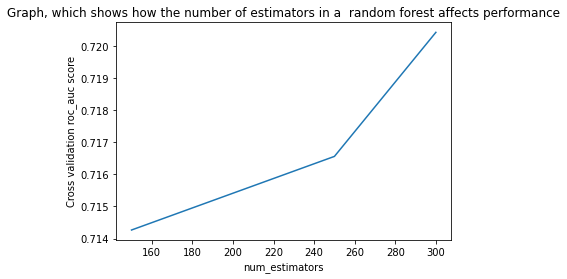

In [52]:
import matplotlib.pyplot as plt
plt.plot(num_trees, results_samples_num_trees)
plt.title('Graph, which shows how the number of estimators in a  random forest affects performance')
plt.xlabel('num_estimators')
plt.ylabel('Cross validation roc_auc score')
plt.show()

In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
results_samples_max_depth= []
max_depths = np.linspace(4, 20, 5, dtype = int,  endpoint=True)
for depth in max_depths:
    clf = RandomForestClassifier(n_estimators = 300, max_depth=depth)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    roc_aucs = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_aucs.append(roc_auc)
    print(roc_aucs)
    results_samples_max_depth.append(np.mean(roc_aucs))


0 0.7184909484020179
1 0.723166318596927
2 0.7175175689375775
3 0.7217790908127816
4 0.7241876326420994
[0.7184909484020179, 0.723166318596927, 0.7175175689375775, 0.7217790908127816, 0.7241876326420994]
0 0.73297049586516
1 0.7363728892288435
2 0.7291855160954078
3 0.7341050869524917
4 0.7349297224160343
[0.73297049586516, 0.7363728892288435, 0.7291855160954078, 0.7341050869524917, 0.7349297224160343]
0 0.7390959341696748
1 0.7418926869372939
2 0.7345354582675527
3 0.7385110126478094
4 0.7396998980682614
[0.7390959341696748, 0.7418926869372939, 0.7345354582675527, 0.7385110126478094, 0.7396998980682614]
0 0.7386952980183757
1 0.7415331307708755
2 0.734362679227967
3 0.7383111998595007
4 0.7387473347901128
[0.7386952980183757, 0.7415331307708755, 0.734362679227967, 0.7383111998595007, 0.7387473347901128]
0 0.7350187732064665
1 0.7372369249414649
2 0.730316698214938
3 0.7340834692140864
4 0.7325685422447936
[0.7350187732064665, 0.7372369249414649, 0.730316698214938, 0.7340834692140864, 

In [56]:
print(results_samples_max_depth)

[0.7241876326420994, 0.7349297224160343, 0.7396998980682614, 0.7387473347901128, 0.7325685422447936]


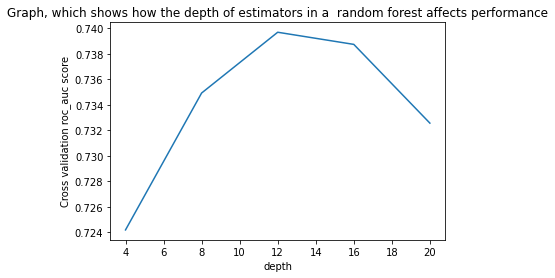

In [57]:
import matplotlib.pyplot as plt
plt.plot(max_depths, results_samples_max_depth)
plt.title('Graph, which shows how the depth of estimators in a  random forest affects performance')
plt.xlabel('depth')
plt.ylabel('Cross validation roc_auc score')
plt.show()

In [58]:
leaves = np.linspace(4, 20, 5, dtype = int,  endpoint=True) 

In [59]:
leaves

array([ 4,  8, 12, 16, 20])

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
results_samples_max_leaf= []
leaves = np.linspace(4, 20, 5, dtype = int,  endpoint=True)
for l in leaves:
    clf = RandomForestClassifier(n_estimators = 300, max_depth=12, min_samples_leaf = l)
    kf = KFold(n_splits=5)
    kf.get_n_splits(X)
    roc_aucs = []
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = Y.loc[train_index], Y.loc[test_index]
        clf.fit(X_train, y_train)
        predict = clf.predict_proba(X_test)[:,1]
        roc_auc = roc_auc_score(y_test, predict)
        print(i, roc_auc)
        roc_aucs.append(roc_auc)
    print(roc_aucs)
    results_samples_max_leaf.append(np.mean(roc_aucs))


0 0.739612391033624
1 0.742418623839526
2 0.7351418397961953
3 0.7396285784639663
4 0.7397717114414986
[0.739612391033624, 0.742418623839526, 0.7351418397961953, 0.7396285784639663, 0.7397717114414986]
0 0.739797045641058
1 0.7426115623647549
2 0.7353428069529875
3 0.7401221554407063
4 0.7410643630087976
[0.739797045641058, 0.7426115623647549, 0.7353428069529875, 0.7401221554407063, 0.7410643630087976]
0 0.7406774279631108
1 0.7436640249487559
2 0.7357643126034242
3 0.7409949756573058
4 0.7412283316942613
[0.7406774279631108, 0.7436640249487559, 0.7357643126034242, 0.7409949756573058, 0.7412283316942613]
0 0.7416505608289192
1 0.7439235060133831
2 0.736504990325509
3 0.7405670361072632
4 0.7412615767511737
[0.7416505608289192, 0.7439235060133831, 0.736504990325509, 0.7405670361072632, 0.7412615767511737]
0 0.7406615743955558
1 0.7440009078771428
2 0.7364524737275823
3 0.7413945582634305
4 0.7418245475974465
[0.7406615743955558, 0.7440009078771428, 0.7364524737275823, 0.7413945582634305

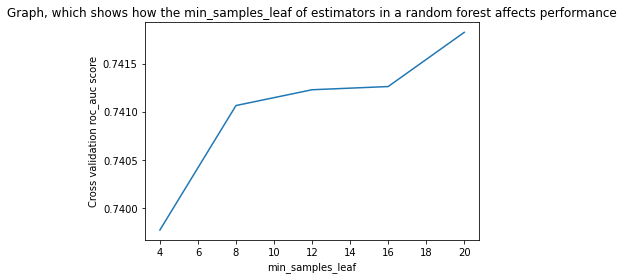

In [61]:
import matplotlib.pyplot as plt
plt.plot(leaves, results_samples_max_leaf)
plt.title('Graph, which shows how the min_samples_leaf of estimators in a random forest affects performance')
plt.xlabel('min_samples_leaf')
plt.ylabel('Cross validation roc_auc score')
plt.show()

# Random forest gridsearch and randomsearch

In [24]:
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
num_trees = [ 350, 400]
max_depth = [12, 13]
min_samples_leaf = [ 21, 24]
grid = {'n_estimators': num_trees,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)
gridsearch_rf = GridSearchCV(RandomForestClassifier(n_jobs = -1), grid, cv = skf.split(X,Y),  verbose=10, scoring = 'roc_auc')

In [25]:
gridsearch_rf.fit(X, Y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] max_depth=12, min_samples_leaf=21, n_estimators=350 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=350, score=0.739, total= 3.0min
[CV] max_depth=12, min_samples_leaf=21, n_estimators=350 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.0min remaining:    0.0s


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=350, score=0.739, total= 3.0min
[CV] max_depth=12, min_samples_leaf=21, n_estimators=350 .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  6.0min remaining:    0.0s


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=350, score=0.742, total= 3.0min
[CV] max_depth=12, min_samples_leaf=21, n_estimators=350 .............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  9.0min remaining:    0.0s


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=350, score=0.744, total= 3.0min
[CV] max_depth=12, min_samples_leaf=21, n_estimators=350 .............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 12.0min remaining:    0.0s


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=350, score=0.742, total= 3.0min
[CV] max_depth=12, min_samples_leaf=21, n_estimators=400 .............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 15.0min remaining:    0.0s


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=400, score=0.739, total= 3.4min
[CV] max_depth=12, min_samples_leaf=21, n_estimators=400 .............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 18.4min remaining:    0.0s


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=400, score=0.739, total= 3.4min
[CV] max_depth=12, min_samples_leaf=21, n_estimators=400 .............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 21.8min remaining:    0.0s


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=400, score=0.741, total= 3.4min
[CV] max_depth=12, min_samples_leaf=21, n_estimators=400 .............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 25.2min remaining:    0.0s


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=400, score=0.744, total= 3.4min
[CV] max_depth=12, min_samples_leaf=21, n_estimators=400 .............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 28.6min remaining:    0.0s


[CV]  max_depth=12, min_samples_leaf=21, n_estimators=400, score=0.742, total= 3.4min
[CV] max_depth=12, min_samples_leaf=24, n_estimators=350 .............
[CV]  max_depth=12, min_samples_leaf=24, n_estimators=350, score=0.739, total= 3.0min
[CV] max_depth=12, min_samples_leaf=24, n_estimators=350 .............
[CV]  max_depth=12, min_samples_leaf=24, n_estimators=350, score=0.739, total= 3.0min
[CV] max_depth=12, min_samples_leaf=24, n_estimators=350 .............
[CV]  max_depth=12, min_samples_leaf=24, n_estimators=350, score=0.742, total= 3.0min
[CV] max_depth=12, min_samples_leaf=24, n_estimators=350 .............
[CV]  max_depth=12, min_samples_leaf=24, n_estimators=350, score=0.744, total= 3.0min
[CV] max_depth=12, min_samples_leaf=24, n_estimators=350 .............
[CV]  max_depth=12, min_samples_leaf=24, n_estimators=350, score=0.742, total= 3.0min
[CV] max_depth=12, min_samples_leaf=24, n_estimators=400 .............
[CV]  max_depth=12, min_samples_leaf=24, n_estimators=400,

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 132.7min finished


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7fe61c37a2b0>,
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_s

In [26]:
print(gridsearch_rf.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=13, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=24, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [27]:
print(gridsearch_rf.best_score_)

0.7425507680768834


In [30]:
from sklearn.model_selection import RandomizedSearchCV

num_trees = [ 350, 400, 450]
max_depth = [12, 13, 14, 15, 16]
min_samples_leaf = [ 21, 24, 26, 28]
grid = {'n_estimators': num_trees,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 1001)
randomsearch_rf = RandomizedSearchCV(RandomForestClassifier(n_jobs = -1), grid, cv = skf.split(X,Y), n_iter=6,   verbose=10, scoring = 'roc_auc')

In [31]:
randomsearch_rf.fit(X, Y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_estimators=450, min_samples_leaf=28, max_depth=15 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=450, min_samples_leaf=28, max_depth=15, score=0.741, total= 4.6min
[CV] n_estimators=450, min_samples_leaf=28, max_depth=15 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.6min remaining:    0.0s


[CV]  n_estimators=450, min_samples_leaf=28, max_depth=15, score=0.742, total= 4.5min
[CV] n_estimators=450, min_samples_leaf=28, max_depth=15 .............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  9.1min remaining:    0.0s


[CV]  n_estimators=450, min_samples_leaf=28, max_depth=15, score=0.745, total= 4.6min
[CV] n_estimators=450, min_samples_leaf=28, max_depth=15 .............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 13.7min remaining:    0.0s


[CV]  n_estimators=450, min_samples_leaf=28, max_depth=15, score=0.747, total= 4.6min
[CV] n_estimators=450, min_samples_leaf=28, max_depth=15 .............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 18.3min remaining:    0.0s


[CV]  n_estimators=450, min_samples_leaf=28, max_depth=15, score=0.744, total= 4.6min
[CV] n_estimators=350, min_samples_leaf=21, max_depth=15 .............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 22.9min remaining:    0.0s


[CV]  n_estimators=350, min_samples_leaf=21, max_depth=15, score=0.741, total= 3.6min
[CV] n_estimators=350, min_samples_leaf=21, max_depth=15 .............


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed: 26.5min remaining:    0.0s


[CV]  n_estimators=350, min_samples_leaf=21, max_depth=15, score=0.742, total= 3.6min
[CV] n_estimators=350, min_samples_leaf=21, max_depth=15 .............


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed: 30.1min remaining:    0.0s


[CV]  n_estimators=350, min_samples_leaf=21, max_depth=15, score=0.744, total= 3.6min
[CV] n_estimators=350, min_samples_leaf=21, max_depth=15 .............


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 33.7min remaining:    0.0s


[CV]  n_estimators=350, min_samples_leaf=21, max_depth=15, score=0.746, total= 3.6min
[CV] n_estimators=350, min_samples_leaf=21, max_depth=15 .............


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 37.3min remaining:    0.0s


[CV]  n_estimators=350, min_samples_leaf=21, max_depth=15, score=0.745, total= 3.6min
[CV] n_estimators=450, min_samples_leaf=24, max_depth=14 .............
[CV]  n_estimators=450, min_samples_leaf=24, max_depth=14, score=0.740, total= 4.4min
[CV] n_estimators=450, min_samples_leaf=24, max_depth=14 .............
[CV]  n_estimators=450, min_samples_leaf=24, max_depth=14, score=0.741, total= 4.4min
[CV] n_estimators=450, min_samples_leaf=24, max_depth=14 .............
[CV]  n_estimators=450, min_samples_leaf=24, max_depth=14, score=0.744, total= 4.4min
[CV] n_estimators=450, min_samples_leaf=24, max_depth=14 .............
[CV]  n_estimators=450, min_samples_leaf=24, max_depth=14, score=0.746, total= 4.4min
[CV] n_estimators=450, min_samples_leaf=24, max_depth=14 .............
[CV]  n_estimators=450, min_samples_leaf=24, max_depth=14, score=0.745, total= 4.4min
[CV] n_estimators=400, min_samples_leaf=24, max_depth=15 .............
[CV]  n_estimators=400, min_samples_leaf=24, max_depth=15,

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 121.6min finished


RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7fe61b179a40>,
                   error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                          

### Best parameters

In [32]:
print(randomsearch_rf.best_estimator_)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)


In [33]:
print(randomsearch_rf.best_score_)

0.7440381679175845


In [38]:
importance = randomsearch_rf.best_estimator_.feature_importances_
importances={'feature_names':X.columns,'feature_importance':importance}
importance_df = pd.DataFrame(importances)

In [42]:
importance_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

Text(0, 0.5, 'FEATURE NAMES')

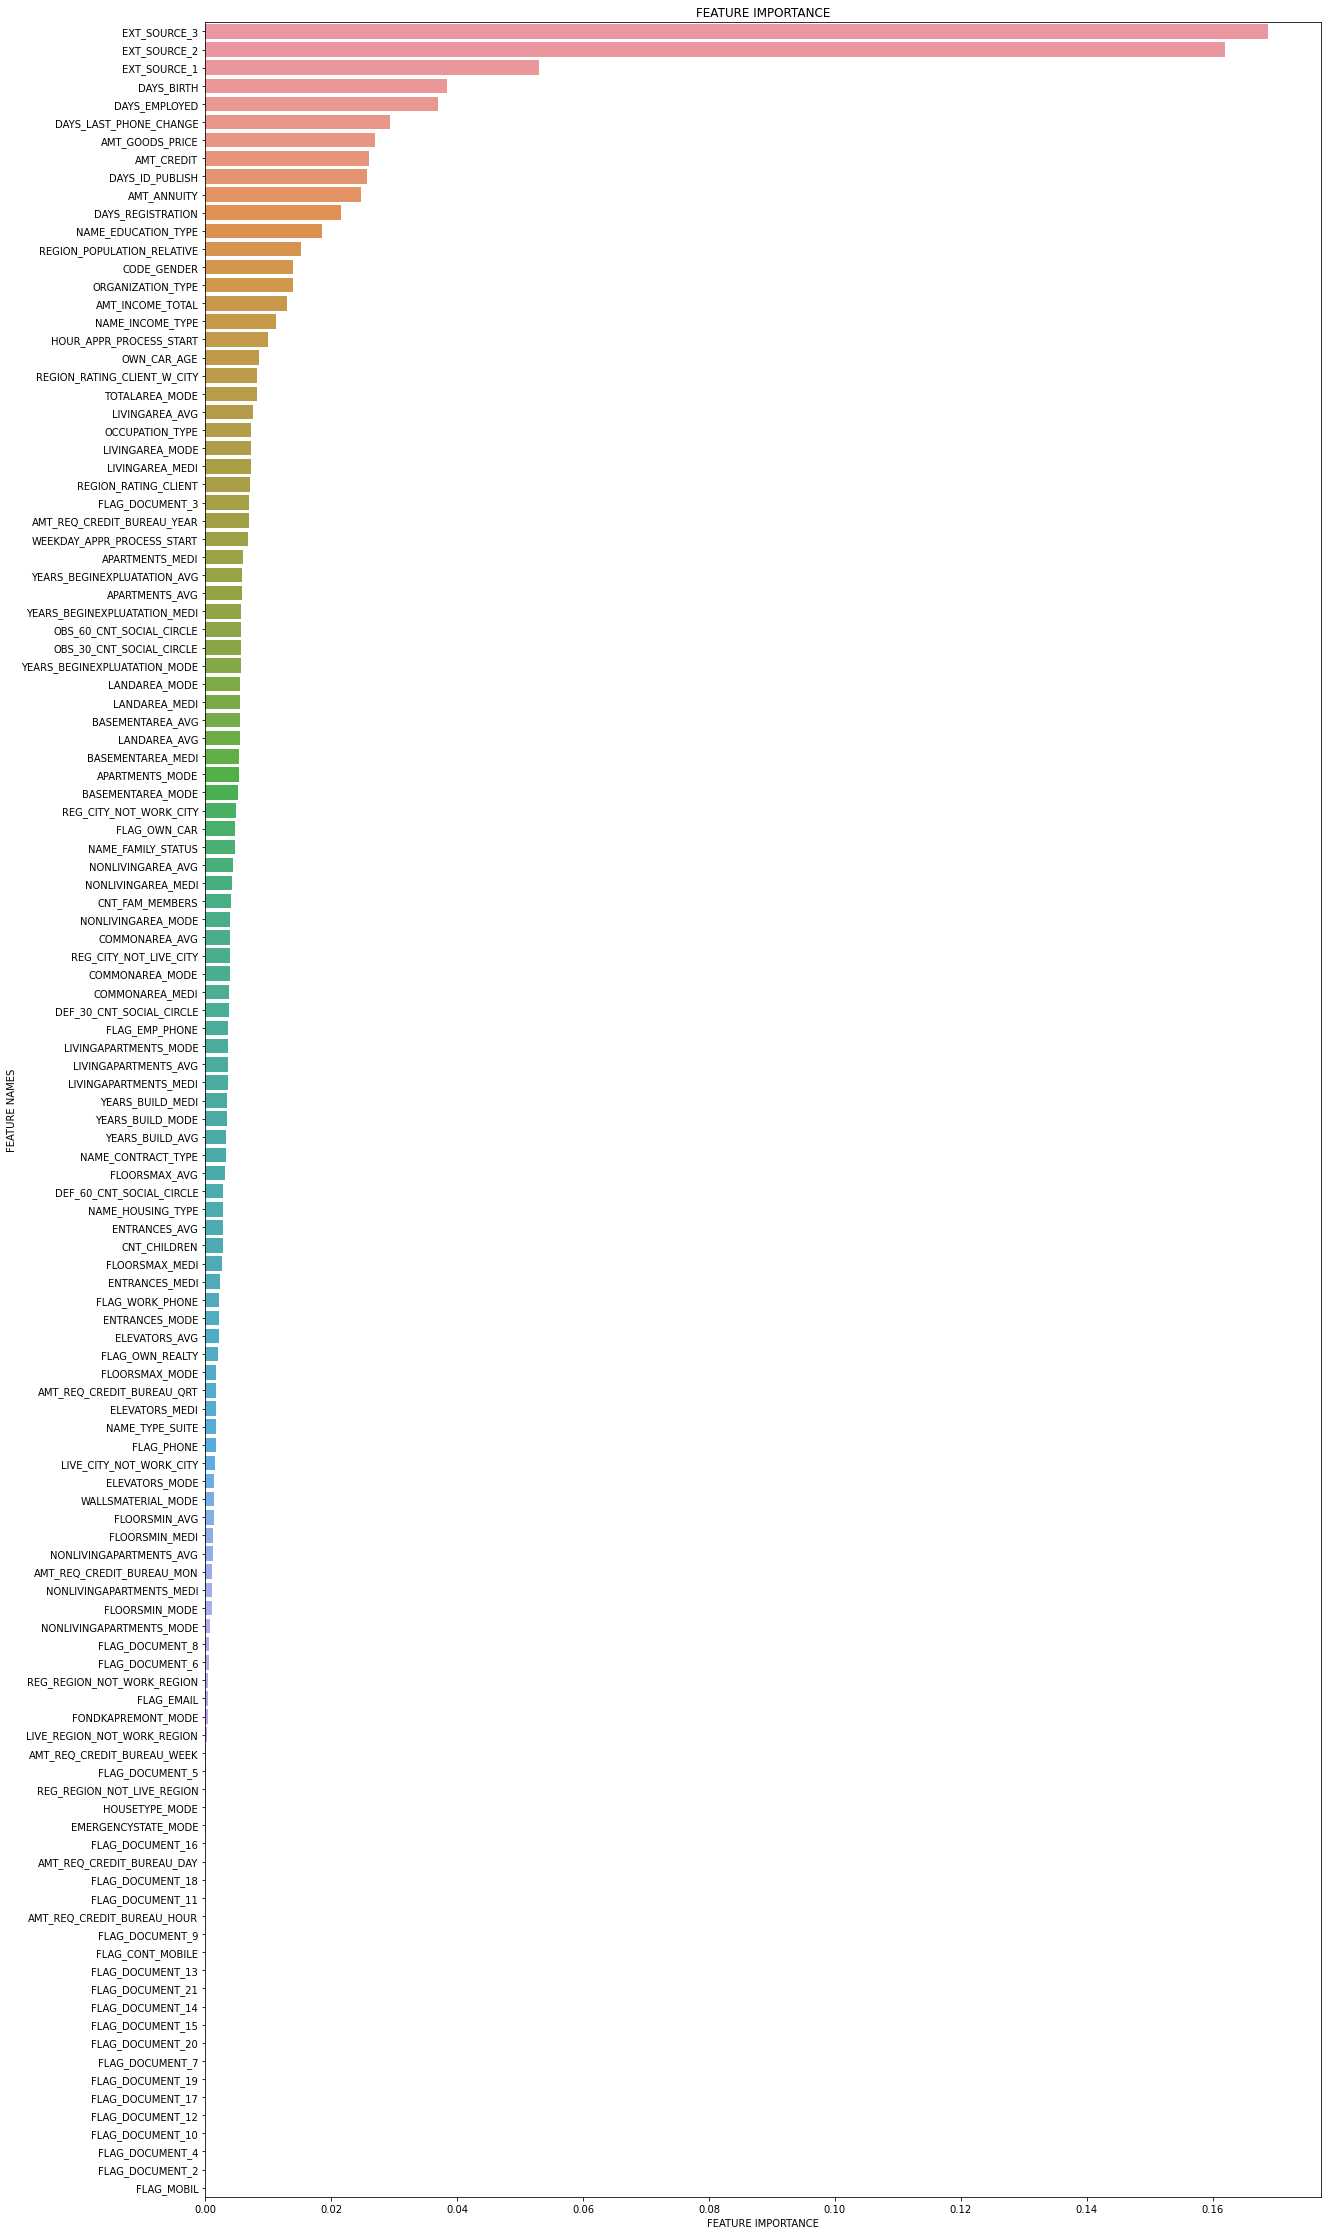

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,40))
sns.barplot(x=importance_df['feature_importance'], y=importance_df['feature_names'])
plt.title( 'FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

### Most important features are normalized scores obtained from external sources, age and days employed

In [49]:
top_5_data = X[['EXT_SOURCE_3', 'EXT_SOURCE_2', 'EXT_SOURCE_1', 'DAYS_BIRTH', 'DAYS_EMPLOYED' ]]

In [54]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=-1, oob_score=False, random_state=None, 
                       warm_start=False, verbose = 10)

In [56]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
roc_aucs = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = top_5_data.loc[train_index], top_5_data.loc[test_index]
    y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    clf.fit(X_train, y_train)
    predict = clf.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    print(i, roc_auc)
    roc_aucs.append(roc_auc)


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450
building tree 2 of 450


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s


building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s


building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.5s


building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.5s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.0s


building tree 30 of 450
building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.6s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450
building tree 48 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.8s


building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   22.3s


building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450
building tree 70 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   26.2s


building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450
building tree 83 of 450
building tree 84 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   31.4s


building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450
building tree 96 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   36.1s


building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   42.1s


building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450
building tree 126 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   47.6s


building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   54.4s


building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min


building tree 160 of 450
building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.1min


building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min


building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450
building tree 219 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  1.4min


building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  1.5min


building tree 240 of 450
building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  1.7min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.8min


building tree 286 of 450
building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.0min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  2.1min


building tree 336 of 450
building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450
building tree 363 of 450
building tree 364 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.3min


building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  2.5min


building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450
building tree 419 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  2.7min


building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min


building tree 448 of 450
building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

0 0.7278340404072285


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450building tree 2 of 450



[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s


building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s


building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.5s


building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.4s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.0s


building tree 30 of 450
building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.5s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.0s


building tree 48 of 450
building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   22.5s


building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   26.7s


building tree 70 of 450
building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450
building tree 83 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   31.7s


building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   37.0s


building tree 96 of 450
building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   42.7s


building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   48.5s


building tree 126 of 450
building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   55.4s


building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450
building tree 160 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min


building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.2min


building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min


building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  1.4min


building tree 219 of 450
building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  1.5min


building tree 239 of 450building tree 240 of 450

building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  1.7min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450
building tree 286 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.8min


building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.0min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450
building tree 336 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  2.2min


building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.3min


building tree 363 of 450
building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  2.5min


building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450
building tree 419 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  2.7min


building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min


building tree 448 of 450
building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

1 0.7306462104170137


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450
building tree 2 of 450


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.8s


building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.6s


building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.9s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.6s


building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.6s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450
building tree 30 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   11.0s


building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.7s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450
building tree 48 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.8s


building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   22.3s


building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450
building tree 70 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   26.3s


building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   31.4s


building tree 83 of 450
building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450
building tree 96 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   36.1s


building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   42.3s


building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450
building tree 126 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   47.7s


building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   54.5s


building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450
building tree 160 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min


building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.1min


building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450
building tree 198 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min


building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  1.4min


building tree 219 of 450
building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450
building tree 240 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  1.5min


building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  1.7min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.8min


building tree 286 of 450
building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.0min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  2.1min


building tree 336 of 450
building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.3min


building tree 363 of 450
building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  2.5min


building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  2.7min


building tree 419 of 450
building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.8min


building tree 448 of 450
building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

2 0.7240888749837917


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450
building tree 2 of 450


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s


building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.7s


building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.4s


building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.4s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450
building tree 30 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.8s


building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.5s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450
building tree 48 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.8s


building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   22.2s


building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450
building tree 70 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   26.2s


building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   31.3s


building tree 83 of 450
building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450
building tree 96 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   36.0s


building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   41.9s


building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   47.7s


building tree 126 of 450
building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   54.2s


building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min


building tree 160 of 450
building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.1min


building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min


building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  1.4min


building tree 219 of 450
building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  1.5min


building tree 240 of 450
building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  1.7min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.8min


building tree 286 of 450
building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.0min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450
building tree 336 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  2.1min


building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.3min


building tree 363 of 450
building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  2.5min


building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450
building tree 419 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  2.7min


building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450
building tree 448 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min


building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

3 0.730274188801707


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450
building tree 2 of 450


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.7s


building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s


building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    3.8s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    5.4s


building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    8.3s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   10.8s


building tree 30 of 450
building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   14.4s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450
building tree 48 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   17.5s


building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   21.9s


building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   26.3s


building tree 70 of 450
building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   31.1s


building tree 83 of 450
building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450
building tree 96 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   36.1s


building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:   41.9s


building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   47.8s


building tree 126 of 450
building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   54.0s


building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450
building tree 160 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min


building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.1min


building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min


building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  1.4min


building tree 219 of 450
building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450
building tree 240 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  1.5min


building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  1.7min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.8min


building tree 286 of 450
building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.0min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450
building tree 336 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  2.1min


building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  2.3min


building tree 363 of 450
building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450
building tree 390 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  2.5min


building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450building tree 414 of 450

building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  2.7min


building tree 419 of 450
building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.8min


building tree 448 of 450
building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  2.9min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

4 0.7332594412851576
0.7292205511789798


[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    3.3s
[Parallel(n_jobs=2)]: Done 450 out of 450 | elapsed:    3.3s finished


### The new score  is lower, but the decrease is not enormous. The top 5 features are capable of modelling the dependent variable very well.

In [57]:
print(np.mean(roc_aucs))

0.7292205511789798


In [60]:
no_top_1_data = X.drop(['EXT_SOURCE_3'], axis = 1)

In [61]:
clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=28, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=-1, oob_score=False, random_state=None, 
                       warm_start=False, verbose = 10)

In [62]:
kf = KFold(n_splits=5)
kf.get_n_splits(X)
roc_aucs = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = no_top_1_data.loc[train_index], no_top_1_data.loc[test_index]
    y_train, y_test = Y.loc[train_index], Y.loc[test_index]
    clf.fit(X_train, y_train)
    predict = clf.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    print(i, roc_auc)
    roc_aucs.append(roc_auc)
print(np.mean(roc_aucs))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450
building tree 2 of 450
building tree 3 of 450
building tree 4 of 450


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s


building tree 5 of 450
building tree 6 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s


building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.6s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.0s


building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   12.6s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450
building tree 30 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.1s


building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.8s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450
building tree 48 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.5s


building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   33.2s


building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450
building tree 70 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   39.1s


building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   47.0s


building tree 83 of 450
building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450
building tree 96 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   54.0s


building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.0min


building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.2min


building tree 126 of 450
building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min


building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450
building tree 160 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min


building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.7min


building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min


building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  2.1min


building tree 219 of 450
building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  2.3min


building tree 240 of 450
building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  2.5min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450
building tree 286 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.7min


building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  3.0min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  3.2min


building tree 336 of 450
building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450
building tree 363 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.5min


building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  3.7min


building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450
building tree 419 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  4.0min


building tree 420 of 450
building tree 421 of 450
building tree 422 of 450building tree 423 of 450

building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min


building tree 448 of 450
building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

0 0.7172162821160281


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450
building tree 2 of 450


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s


building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.5s


building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.7s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.4s


building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   12.8s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.5s


building tree 30 of 450
building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   22.2s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450
building tree 48 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.9s


building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   33.9s


building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   39.9s


building tree 70 of 450
building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   47.9s


building tree 83 of 450
building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   55.3s


building tree 96 of 450
building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.1min


building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.2min


building tree 126 of 450
building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min


building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min


building tree 160 of 450
building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.7min


building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min


building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  2.1min


building tree 219 of 450
building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450
building tree 240 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  2.3min


building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  2.5min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.8min


building tree 286 of 450
building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  3.0min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450
building tree 336 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  3.3min


building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.5min


building tree 363 of 450
building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  3.8min


building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  4.1min


building tree 419 of 450
building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450
building tree 448 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.4min


building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.4min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

1 0.7183533576905505


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450
building tree 2 of 450


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s


building tree 3 of 450
building tree 4 of 450
building tree 5 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.4s


building tree 6 of 450
building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.6s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.3s


building tree 16 of 450
building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   12.5s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.2s


building tree 30 of 450
building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.6s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.7s


building tree 48 of 450
building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450
building tree 59 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   33.2s


building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   39.3s


building tree 70 of 450
building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   46.7s


building tree 83 of 450
building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   54.4s


building tree 96 of 450
building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.0min


building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.2min


building tree 126 of 450
building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min


building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min


building tree 160 of 450
building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450
building tree 179 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.7min


building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min


building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450
building tree 219 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  2.1min


building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  2.3min


building tree 240 of 450
building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  2.5min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.7min


building tree 286 of 450
building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  3.0min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  3.2min


building tree 336 of 450
building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.5min


building tree 363 of 450
building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  3.7min


building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450
building tree 419 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  4.0min


building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min


building tree 448 of 450
building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

2 0.7132416309245881


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450
building tree 2 of 450


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.1s


building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s


building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.6s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.1s


building tree 16 of 450
building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   12.4s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450
building tree 30 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.9s


building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.5s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.3s


building tree 48 of 450
building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   33.2s


building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   39.2s


building tree 70 of 450
building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   47.0s


building tree 83 of 450
building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   54.1s


building tree 96 of 450
building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.1min


building tree 111 of 450
building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.2min


building tree 126 of 450
building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450
building tree 143 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min


building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min


building tree 160 of 450
building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.7min


building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min


building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450
building tree 219 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  2.1min


building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  2.3min


building tree 240 of 450
building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  2.5min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.7min


building tree 286 of 450
building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.9min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  3.2min


building tree 336 of 450
building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.4min


building tree 363 of 450
building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  3.7min


building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  4.0min


building tree 419 of 450
building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.3min


building tree 448 of 450
building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    1.1s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

3 0.7130447259620426


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 450
building tree 2 of 450


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s


building tree 3 of 450
building tree 4 of 450
building tree 5 of 450
building tree 6 of 450


[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.3s


building tree 7 of 450
building tree 8 of 450
building tree 9 of 450
building tree 10 of 450


[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.6s


building tree 11 of 450
building tree 12 of 450
building tree 13 of 450
building tree 14 of 450
building tree 15 of 450
building tree 16 of 450


[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.1s


building tree 17 of 450
building tree 18 of 450
building tree 19 of 450
building tree 20 of 450
building tree 21 of 450
building tree 22 of 450


[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   12.3s


building tree 23 of 450
building tree 24 of 450
building tree 25 of 450
building tree 26 of 450
building tree 27 of 450
building tree 28 of 450
building tree 29 of 450
building tree 30 of 450


[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   15.9s


building tree 31 of 450
building tree 32 of 450
building tree 33 of 450
building tree 34 of 450
building tree 35 of 450
building tree 36 of 450
building tree 37 of 450
building tree 38 of 450


[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.4s


building tree 39 of 450
building tree 40 of 450
building tree 41 of 450
building tree 42 of 450
building tree 43 of 450
building tree 44 of 450
building tree 45 of 450
building tree 46 of 450
building tree 47 of 450
building tree 48 of 450


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   26.3s


building tree 49 of 450
building tree 50 of 450
building tree 51 of 450
building tree 52 of 450
building tree 53 of 450
building tree 54 of 450
building tree 55 of 450
building tree 56 of 450
building tree 57 of 450
building tree 58 of 450


[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   32.8s


building tree 59 of 450
building tree 60 of 450
building tree 61 of 450
building tree 62 of 450
building tree 63 of 450
building tree 64 of 450
building tree 65 of 450
building tree 66 of 450
building tree 67 of 450
building tree 68 of 450
building tree 69 of 450


[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   39.3s


building tree 70 of 450
building tree 71 of 450
building tree 72 of 450
building tree 73 of 450
building tree 74 of 450
building tree 75 of 450
building tree 76 of 450
building tree 77 of 450
building tree 78 of 450
building tree 79 of 450
building tree 80 of 450
building tree 81 of 450
building tree 82 of 450


[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   46.9s


building tree 83 of 450
building tree 84 of 450
building tree 85 of 450
building tree 86 of 450
building tree 87 of 450
building tree 88 of 450
building tree 89 of 450
building tree 90 of 450
building tree 91 of 450
building tree 92 of 450
building tree 93 of 450
building tree 94 of 450
building tree 95 of 450


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   54.6s


building tree 96 of 450
building tree 97 of 450
building tree 98 of 450
building tree 99 of 450
building tree 100 of 450
building tree 101 of 450
building tree 102 of 450
building tree 103 of 450
building tree 104 of 450
building tree 105 of 450
building tree 106 of 450
building tree 107 of 450
building tree 108 of 450
building tree 109 of 450
building tree 110 of 450
building tree 111 of 450


[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:  1.1min


building tree 112 of 450
building tree 113 of 450
building tree 114 of 450
building tree 115 of 450
building tree 116 of 450
building tree 117 of 450
building tree 118 of 450
building tree 119 of 450
building tree 120 of 450
building tree 121 of 450
building tree 122 of 450
building tree 123 of 450
building tree 124 of 450
building tree 125 of 450


[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  1.2min


building tree 126 of 450
building tree 127 of 450
building tree 128 of 450
building tree 129 of 450
building tree 130 of 450
building tree 131 of 450
building tree 132 of 450
building tree 133 of 450
building tree 134 of 450
building tree 135 of 450
building tree 136 of 450
building tree 137 of 450
building tree 138 of 450
building tree 139 of 450
building tree 140 of 450
building tree 141 of 450
building tree 142 of 450


[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min


building tree 143 of 450
building tree 144 of 450
building tree 145 of 450
building tree 146 of 450
building tree 147 of 450
building tree 148 of 450
building tree 149 of 450
building tree 150 of 450
building tree 151 of 450
building tree 152 of 450
building tree 153 of 450
building tree 154 of 450
building tree 155 of 450
building tree 156 of 450
building tree 157 of 450
building tree 158 of 450
building tree 159 of 450


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.5min


building tree 160 of 450
building tree 161 of 450
building tree 162 of 450
building tree 163 of 450
building tree 164 of 450
building tree 165 of 450
building tree 166 of 450
building tree 167 of 450
building tree 168 of 450
building tree 169 of 450
building tree 170 of 450
building tree 171 of 450
building tree 172 of 450
building tree 173 of 450
building tree 174 of 450
building tree 175 of 450
building tree 176 of 450
building tree 177 of 450
building tree 178 of 450


[Parallel(n_jobs=-1)]: Done 177 tasks      | elapsed:  1.7min


building tree 179 of 450
building tree 180 of 450
building tree 181 of 450
building tree 182 of 450
building tree 183 of 450
building tree 184 of 450
building tree 185 of 450
building tree 186 of 450
building tree 187 of 450
building tree 188 of 450
building tree 189 of 450
building tree 190 of 450
building tree 191 of 450
building tree 192 of 450
building tree 193 of 450
building tree 194 of 450
building tree 195 of 450
building tree 196 of 450
building tree 197 of 450


[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min


building tree 198 of 450
building tree 199 of 450
building tree 200 of 450
building tree 201 of 450
building tree 202 of 450
building tree 203 of 450
building tree 204 of 450
building tree 205 of 450
building tree 206 of 450
building tree 207 of 450
building tree 208 of 450
building tree 209 of 450
building tree 210 of 450
building tree 211 of 450
building tree 212 of 450
building tree 213 of 450
building tree 214 of 450
building tree 215 of 450
building tree 216 of 450
building tree 217 of 450
building tree 218 of 450
building tree 219 of 450


[Parallel(n_jobs=-1)]: Done 217 tasks      | elapsed:  2.1min


building tree 220 of 450
building tree 221 of 450
building tree 222 of 450
building tree 223 of 450
building tree 224 of 450
building tree 225 of 450
building tree 226 of 450
building tree 227 of 450
building tree 228 of 450
building tree 229 of 450
building tree 230 of 450
building tree 231 of 450
building tree 232 of 450
building tree 233 of 450
building tree 234 of 450
building tree 235 of 450
building tree 236 of 450
building tree 237 of 450
building tree 238 of 450
building tree 239 of 450


[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  2.3min


building tree 240 of 450
building tree 241 of 450
building tree 242 of 450
building tree 243 of 450
building tree 244 of 450
building tree 245 of 450
building tree 246 of 450
building tree 247 of 450
building tree 248 of 450
building tree 249 of 450
building tree 250 of 450
building tree 251 of 450
building tree 252 of 450
building tree 253 of 450
building tree 254 of 450
building tree 255 of 450
building tree 256 of 450
building tree 257 of 450
building tree 258 of 450
building tree 259 of 450
building tree 260 of 450
building tree 261 of 450
building tree 262 of 450


[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:  2.5min


building tree 263 of 450
building tree 264 of 450
building tree 265 of 450
building tree 266 of 450
building tree 267 of 450
building tree 268 of 450
building tree 269 of 450
building tree 270 of 450
building tree 271 of 450
building tree 272 of 450
building tree 273 of 450
building tree 274 of 450
building tree 275 of 450
building tree 276 of 450
building tree 277 of 450
building tree 278 of 450
building tree 279 of 450
building tree 280 of 450
building tree 281 of 450
building tree 282 of 450
building tree 283 of 450
building tree 284 of 450
building tree 285 of 450


[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  2.7min


building tree 286 of 450
building tree 287 of 450
building tree 288 of 450
building tree 289 of 450
building tree 290 of 450
building tree 291 of 450
building tree 292 of 450
building tree 293 of 450
building tree 294 of 450
building tree 295 of 450
building tree 296 of 450
building tree 297 of 450
building tree 298 of 450
building tree 299 of 450
building tree 300 of 450
building tree 301 of 450
building tree 302 of 450
building tree 303 of 450
building tree 304 of 450
building tree 305 of 450
building tree 306 of 450
building tree 307 of 450
building tree 308 of 450
building tree 309 of 450
building tree 310 of 450


[Parallel(n_jobs=-1)]: Done 309 tasks      | elapsed:  2.9min


building tree 311 of 450
building tree 312 of 450
building tree 313 of 450
building tree 314 of 450
building tree 315 of 450
building tree 316 of 450
building tree 317 of 450
building tree 318 of 450
building tree 319 of 450
building tree 320 of 450
building tree 321 of 450
building tree 322 of 450
building tree 323 of 450
building tree 324 of 450
building tree 325 of 450
building tree 326 of 450
building tree 327 of 450
building tree 328 of 450
building tree 329 of 450
building tree 330 of 450
building tree 331 of 450
building tree 332 of 450
building tree 333 of 450
building tree 334 of 450
building tree 335 of 450


[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:  3.2min


building tree 336 of 450
building tree 337 of 450
building tree 338 of 450
building tree 339 of 450
building tree 340 of 450
building tree 341 of 450
building tree 342 of 450
building tree 343 of 450
building tree 344 of 450
building tree 345 of 450
building tree 346 of 450
building tree 347 of 450
building tree 348 of 450
building tree 349 of 450
building tree 350 of 450
building tree 351 of 450
building tree 352 of 450
building tree 353 of 450
building tree 354 of 450
building tree 355 of 450
building tree 356 of 450
building tree 357 of 450
building tree 358 of 450
building tree 359 of 450
building tree 360 of 450
building tree 361 of 450
building tree 362 of 450
building tree 363 of 450


[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.4min


building tree 364 of 450
building tree 365 of 450
building tree 366 of 450
building tree 367 of 450
building tree 368 of 450
building tree 369 of 450
building tree 370 of 450
building tree 371 of 450
building tree 372 of 450
building tree 373 of 450
building tree 374 of 450
building tree 375 of 450
building tree 376 of 450
building tree 377 of 450
building tree 378 of 450
building tree 379 of 450
building tree 380 of 450
building tree 381 of 450
building tree 382 of 450
building tree 383 of 450
building tree 384 of 450
building tree 385 of 450
building tree 386 of 450
building tree 387 of 450
building tree 388 of 450
building tree 389 of 450


[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:  3.7min


building tree 390 of 450
building tree 391 of 450
building tree 392 of 450
building tree 393 of 450
building tree 394 of 450
building tree 395 of 450
building tree 396 of 450
building tree 397 of 450
building tree 398 of 450
building tree 399 of 450
building tree 400 of 450
building tree 401 of 450
building tree 402 of 450
building tree 403 of 450
building tree 404 of 450
building tree 405 of 450
building tree 406 of 450
building tree 407 of 450
building tree 408 of 450
building tree 409 of 450
building tree 410 of 450
building tree 411 of 450
building tree 412 of 450
building tree 413 of 450
building tree 414 of 450
building tree 415 of 450
building tree 416 of 450
building tree 417 of 450
building tree 418 of 450


[Parallel(n_jobs=-1)]: Done 417 tasks      | elapsed:  4.0min


building tree 419 of 450
building tree 420 of 450
building tree 421 of 450
building tree 422 of 450
building tree 423 of 450
building tree 424 of 450
building tree 425 of 450
building tree 426 of 450
building tree 427 of 450
building tree 428 of 450
building tree 429 of 450
building tree 430 of 450
building tree 431 of 450
building tree 432 of 450
building tree 433 of 450
building tree 434 of 450
building tree 435 of 450
building tree 436 of 450
building tree 437 of 450
building tree 438 of 450
building tree 439 of 450
building tree 440 of 450
building tree 441 of 450
building tree 442 of 450
building tree 443 of 450
building tree 444 of 450
building tree 445 of 450
building tree 446 of 450
building tree 447 of 450


[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min


building tree 448 of 450
building tree 449 of 450
building tree 450 of 450


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:  4.3min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   4 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done  21 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done  28 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done  57 tasks      | elapsed:    0.6s
[Parallel(n_jobs=2)]: Done  68 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done  81 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done  94 tasks      | elapsed:    1.0s
[Parallel(n_jobs=2)]: Done 109 tasks      | elapsed:    1.2s
[Parallel(n_jobs=2)]: Done 124 tasks      | elapsed:    

4 0.7145161761847268
0.7152744345755873


[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    4.7s
[Parallel(n_jobs=2)]: Done 450 out of 450 | elapsed:    4.7s finished


### After deleting the most important feature, the drop is more significant. Probably, the weight of the external score is larger than that of the other features.

In [63]:
print(np.mean(roc_aucs))

0.7152744345755873
